# Analise de séries temporais sobre a contaminação do vírus COVID-19 pelo mundo.

# Import


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express  as px
import plotly.graph_objects as go

# Read data

In [5]:
url = 'covid_19_data.csv'
df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


# Adjusting columns


In [6]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [11]:
import re
def correct_columns(col_name):
  return re.sub(r"[/| ]", "", col_name).lower()

In [12]:
df.columns = [correct_columns(col) for col in df.columns]   # type: ignore
df.head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


# Brazil
### Only data from Brazil will be selected

In [13]:
df.loc[df.countryregion == 'Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [14]:
#To catch cases that are at least 1 confirmed with COVID
brazil = df.loc[(df.countryregion == 'Brazil') & (df.confirmed > 0)]
brazil.head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0


# Casos Confirmados


In [16]:
#Graph of the evolution of confirmed cases
px.line(brazil, 'observationdate', 'confirmed', title='Casos confirmados no Brazil')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'observationdate=%{x}<br>confirmed=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 2, 26, 0, 0),
                          datetime.datetime(2020, 2, 27, 0, 0),
                          datetime.datetime(2020, 2, 28, 0, 0),
                          datetime.datetime(2020, 2, 29, 0, 0),
                          datetime.datetime(2020, 3, 1, 0, 0),
                          datetime.datetime(2020, 3, 2, 0, 0),
                          datetime.datetime(2020, 3, 3, 0, 0),
                          datetime.datetime(2020, 3, 4, 0, 0),
                          datetime.datetime(2020, 3, 5, 0, 0),
                          datetime.datetime(2020, 3, 6, 0, 0),
                          datetime.datetime(2020, 3, 7, 0, 0),
                          datetime.datetime(2020, 3, 8, 0, 0),
                          datetime.datetime(2020, 3, 9, 0, 0),
                          datetime.datetime(2020, 3, 10, 0, 0),
                          datetime.datetime(2020, 3, 11, 0, 0),
                          datetime.datetime(2020, 3, 12, 0, 0),
                          datetime.datetime(2020, 3, 13, 0, 0),
                          datetime.datetime(2020, 3, 14, 0, 0),
                          datetime.datetime(2020, 3, 15, 0, 0),
                          datetime.datetime(2020, 3, 16, 0, 0),
                          datetime.datetime(2020, 3, 17, 0, 0),
                          datetime.datetime(2020, 3, 18, 0, 0),
                          datetime.datetime(2020, 3, 19, 0, 0),
                          datetime.datetime(2020, 3, 20, 0, 0),
                          datetime.datetime(2020, 3, 21, 0, 0),
                          datetime.datetime(2020, 3, 22, 0, 0),
                          datetime.datetime(2020, 3, 23, 0, 0),
                          datetime.datetime(2020, 3, 24, 0, 0),
                          datetime.datetime(2020, 3, 25, 0, 0),
                          datetime.datetime(2020, 3, 26, 0, 0),
                          datetime.datetime(2020, 3, 27, 0, 0),
                          datetime.datetime(2020, 3, 28, 0, 0),
                          datetime.datetime(2020, 3, 29, 0, 0),
                          datetime.datetime(2020, 3, 30, 0, 0),
                          datetime.datetime(2020, 3, 31, 0, 0),
                          datetime.datetime(2020, 4, 1, 0, 0),
                          datetime.datetime(2020, 4, 2, 0, 0),
                          datetime.datetime(2020, 4, 3, 0, 0),
                          datetime.datetime(2020, 4, 4, 0, 0),
                          datetime.datetime(2020, 4, 5, 0, 0),
                          datetime.datetime(2020, 4, 6, 0, 0),
                          datetime.datetime(2020, 4, 7, 0, 0),
                          datetime.datetime(2020, 4, 8, 0, 0),
                          datetime.datetime(2020, 4, 9, 0, 0),
                          datetime.datetime(2020, 4, 10, 0, 0),
                          datetime.datetime(2020, 4, 11, 0, 0),
                          datetime.datetime(2020, 4, 12, 0, 0),
                          datetime.datetime(2020, 4, 13, 0, 0),
                          datetime.datetime(2020, 4, 14, 0, 0),
                          datetime.datetime(2020, 4, 15, 0, 0),
                          datetime.datetime(2020, 4, 16, 0, 0),
                          datetime.datetime(2020, 4, 17, 0, 0),
                          datetime.datetime(2020, 4, 18, 0, 0),
                          datetime.datetime(2020, 4, 19, 0, 0),
                          datetime.datetime(2020, 4, 20, 0, 0),
                          datetime.datetime(2020, 4, 21, 0, 0),
                          datetime.dat

# Novos casos por dia

In [19]:
brazil['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else brazil['confirmed'].iloc[x] - brazil['confirmed'].iloc[x-1],
    np.arange(brazil.shape[0])
))


/var/folders/1w/lw9cw7m91x16w7vynkd_4rpr0000gn/T/ipykernel_2647/2966550995.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
# Vizualizando
px.line(brazil, x='observationdate', y='novoscasos', title='Novos casos por dia')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'observationdate=%{x}<br>novoscasos=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 2, 26, 0, 0),
                          datetime.datetime(2020, 2, 27, 0, 0),
                          datetime.datetime(2020, 2, 28, 0, 0),
                          datetime.datetime(2020, 2, 29, 0, 0),
                          datetime.datetime(2020, 3, 1, 0, 0),
                          datetime.datetime(2020, 3, 2, 0, 0),
                          datetime.datetime(2020, 3, 3, 0, 0),
                          datetime.datetime(2020, 3, 4, 0, 0),
                          datetime.datetime(2020, 3, 5, 0, 0),
                          datetime.datetime(2020, 3, 6, 0, 0),
                          datetime.datetime(2020, 3, 7, 0, 0),
                          datetime.datetime(2020, 3, 8, 0, 0),
                          datetime.datetime(2020, 3, 9, 0, 0),
                          datetime.datetime(2020, 3, 10, 0, 0),
                          datetime.datetime(2020, 3, 11, 0, 0),
                          datetime.datetime(2020, 3, 12, 0, 0),
                          datetime.datetime(2020, 3, 13, 0, 0),
                          datetime.datetime(2020, 3, 14, 0, 0),
                          datetime.datetime(2020, 3, 15, 0, 0),
                          datetime.datetime(2020, 3, 16, 0, 0),
                          datetime.datetime(2020, 3, 17, 0, 0),
                          datetime.datetime(2020, 3, 18, 0, 0),
                          datetime.datetime(2020, 3, 19, 0, 0),
                          datetime.datetime(2020, 3, 20, 0, 0),
                          datetime.datetime(2020, 3, 21, 0, 0),
                          datetime.datetime(2020, 3, 22, 0, 0),
                          datetime.datetime(2020, 3, 23, 0, 0),
                          datetime.datetime(2020, 3, 24, 0, 0),
                          datetime.datetime(2020, 3, 25, 0, 0),
                          datetime.datetime(2020, 3, 26, 0, 0),
                          datetime.datetime(2020, 3, 27, 0, 0),
                          datetime.datetime(2020, 3, 28, 0, 0),
                          datetime.datetime(2020, 3, 29, 0, 0),
                          datetime.datetime(2020, 3, 30, 0, 0),
                          datetime.datetime(2020, 3, 31, 0, 0),
                          datetime.datetime(2020, 4, 1, 0, 0),
                          datetime.datetime(2020, 4, 2, 0, 0),
                          datetime.datetime(2020, 4, 3, 0, 0),
                          datetime.datetime(2020, 4, 4, 0, 0),
                          datetime.datetime(2020, 4, 5, 0, 0),
                          datetime.datetime(2020, 4, 6, 0, 0),
                          datetime.datetime(2020, 4, 7, 0, 0),
                          datetime.datetime(2020, 4, 8, 0, 0),
                          datetime.datetime(2020, 4, 9, 0, 0),
                          datetime.datetime(2020, 4, 10, 0, 0),
                          datetime.datetime(2020, 4, 11, 0, 0),
                          datetime.datetime(2020, 4, 12, 0, 0),
                          datetime.datetime(2020, 4, 13, 0, 0),
                          datetime.datetime(2020, 4, 14, 0, 0),
                          datetime.datetime(2020, 4, 15, 0, 0),
                          datetime.datetime(2020, 4, 16, 0, 0),
                          datetime.datetime(2020, 4, 17, 0, 0),
                          datetime.datetime(2020, 4, 18, 0, 0),
                          datetime.datetime(2020, 4, 19, 0, 0),
                          datetime.datetime(2020, 4, 20, 0, 0),
                          datetime.datetime(2020, 4, 21, 0, 0),
                          datetime.da

# Deaths

In [22]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=brazil.observationdate, y=brazil.deaths, name='Mortes', 
               mode='lines+markers', line=dict(color='red'))
)
#Layout
fig.update_layout(title='Mortes por COVID-19 no Brazil')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Taxa de Crescimento

In [26]:
def growth_rate(data, variable, data_inicio=None, data_fim=None):
    # Se data_inicio for None, define como a primeira data disponível no dataset
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    if data_fim == None:
        data_fim = data.observationdate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
    
    # Define os valores de presente e passado
    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0]
    
    # Define o número de pontos no tempo q vamos avaliar
    n = (data_fim - data_inicio).days
    
    # Calcula a taxa
    taxa = (presente/passado)**(1/n) - 1

    return taxa*100

In [27]:
#Taxa de crescimento médio do COVID no Brazil em todo o período
growth_rate(brazil, 'confirmed')

16.27183353112116

In [28]:
def daily_growth_rate(data, variable, data_inicio=None):
  # Se data_inicio for None, define como a primeira data disponível
  if data_inicio == None:
    data_inicio = data.observationdate.loc[data[variable] > 0].min()
  else:
        data_inicio = pd.to_datetime(data_inicio)
  data_fim = data.observationdate.max()
  # Define o número de pontos no tempo q vamos avaliar
  n = (data_fim - data_inicio).days

  #Taxa calculada de um dia para o outro
  taxas = list(map(
      lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / 
      data[variable].iloc[x-1], range(1, n+1)
  ))
  return np.array(taxas) * 100


In [29]:
tx_dia = daily_growth_rate(brazil, 'confirmed')
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [30]:
primeiro_dia = brazil.observationdate.loc[brazil.confirmed > 0].min()
px.line(x=pd.date_range(primeiro_dia, brazil.observationdate.max())[1:],
        y=tx_dia, title='Taxa de crescimento de casos confirmados no Brazil')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 2, 27, 0, 0),
                          datetime.datetime(2020, 2, 28, 0, 0),
                          datetime.datetime(2020, 2, 29, 0, 0),
                          datetime.datetime(2020, 3, 1, 0, 0),
                          datetime.datetime(2020, 3, 2, 0, 0),
                          datetime.datetime(2020, 3, 3, 0, 0),
                          datetime.datetime(2020, 3, 4, 0, 0),
                          datetime.datetime(2020, 3, 5, 0, 0),
                          datetime.datetime(2020, 3, 6, 0, 0),
                          datetime.datetime(2020, 3, 7, 0, 0),
                          datetime.datetime(2020, 3, 8, 0, 0),
                          datetime.datetime(2020, 3, 9, 0, 0),
                          datetime.datetime(2020, 3, 10, 0, 0),
                          datetime.datetime(2020, 3, 11, 0, 0),
                          datetime.datetime(2020, 3, 12, 0, 0),
                          datetime.datetime(2020, 3, 13, 0, 0),
                          datetime.datetime(2020, 3, 14, 0, 0),
                          datetime.datetime(2020, 3, 15, 0, 0),
                          datetime.datetime(2020, 3, 16, 0, 0),
                          datetime.datetime(2020, 3, 17, 0, 0),
                          datetime.datetime(2020, 3, 18, 0, 0),
                          datetime.datetime(2020, 3, 19, 0, 0),
                          datetime.datetime(2020, 3, 20, 0, 0),
                          datetime.datetime(2020, 3, 21, 0, 0),
                          datetime.datetime(2020, 3, 22, 0, 0),
                          datetime.datetime(2020, 3, 23, 0, 0),
                          datetime.datetime(2020, 3, 24, 0, 0),
                          datetime.datetime(2020, 3, 25, 0, 0),
                          datetime.datetime(2020, 3, 26, 0, 0),
                          datetime.datetime(2020, 3, 27, 0, 0),
                          datetime.datetime(2020, 3, 28, 0, 0),
                          datetime.datetime(2020, 3, 29, 0, 0),
                          datetime.datetime(2020, 3, 30, 0, 0),
                          datetime.datetime(2020, 3, 31, 0, 0),
                          datetime.datetime(2020, 4, 1, 0, 0),
                          datetime.datetime(2020, 4, 2, 0, 0),
                          datetime.datetime(2020, 4, 3, 0, 0),
                          datetime.datetime(2020, 4, 4, 0, 0),
                          datetime.datetime(2020, 4, 5, 0, 0),
                          datetime.datetime(2020, 4, 6, 0, 0),
                          datetime.datetime(2020, 4, 7, 0, 0),
                          datetime.datetime(2020, 4, 8, 0, 0),
                          datetime.datetime(2020, 4, 9, 0, 0),
                          datetime.datetime(2020, 4, 10, 0, 0),
                          datetime.datetime(2020, 4, 11, 0, 0),
                          datetime.datetime(2020, 4, 12, 0, 0),
                          datetime.datetime(2020, 4, 13, 0, 0),
                          datetime.datetime(2020, 4, 14, 0, 0),
                          datetime.datetime(2020, 4, 15, 0, 0),
                          datetime.datetime(2020, 4, 16, 0, 0),
                          datetime.datetime(2020, 4, 17, 0, 0),
                          datetime.datetime(2020, 4, 18, 0, 0),
                          datetime.datetime(2020, 4, 19, 0, 0),
                          datetime.datetime(2020, 4, 20, 0, 0),
                          datetime.datetime(2020, 4, 21, 0, 0),
                          datetime.datetime(2020, 4, 22, 0, 0),
                          datetime.datetime(2020, 4, 23, 0, 

# Predictions

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

ImportError: The `scipy` install you are using seems to be broken, (extension modules cannot be imported), please try reinstalling.

In [34]:
confirmados = brazil.confirmed
confirmados.index = brazil.observationdate
confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [35]:
res = seasonal_decompose(confirmados)

NameError: name 'seasonal_decompose' is not defined

NameError: name 'res' is not defined

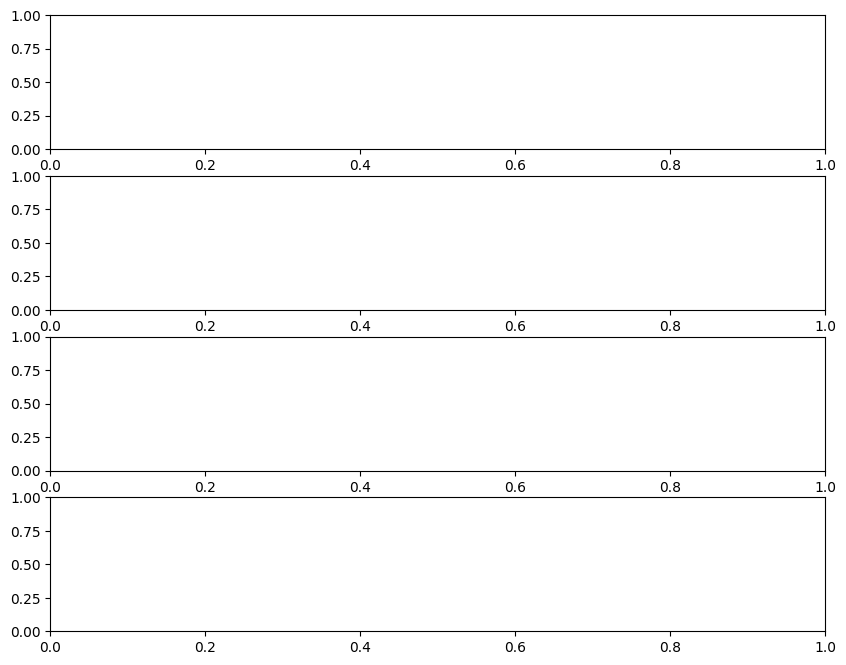

In [40]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(10,8))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmados.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

# ARIMA
### Media moda integrada autoregressiva

In [41]:
#isntalando arima
%pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 607.1/607.1 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 986.3/986.3 kB 2.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 3.9 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 3.4 MB/s eta 0:00:00a 0:00:01
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached pytz-2022.5-py2.py3-n

In [42]:
from pmdarima.arima import auto_arima
modelo = auto_arima(confirmados)

ImportError: The `scipy` install you are using seems to be broken, (extension modules cannot be imported), please try reinstalling.

In [43]:
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados,name='Observados'
))

fig.add_trace(go.Scatter(
    x=confirmados.index,y=modelo.predict_in_sample(),name='Preditos'
))

fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20', '2020-06-20',y=modelo.predict(31),name='Forecast')
))

fig.updtade_layout(title='Previsão de casos confirmados no Brazil para os próximos 30 dias')
fig.show()

NameError: name 'modelo' is not defined

In [44]:
pd.date_range('2020-05-01', '2020-05-19')

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19'],
              dtype='datetime64[ns]', freq='D')

# Modelo de Crescimento

In [45]:
#Instalando Biblioteca
%pip install -c conda-forge fbprophet -y

ValueError: The python kernel does not appear to be a conda environment.  Please use ``%pip install`` instead.

In [ ]:
from fbprophet import Prophet

In [ ]:
# preparando os dados
train = confirmados.reset_index()[:-5]
test = confirmados.reset_index()[-5:]

# renomeia colunas
train.rename(columns={"observationdate":"ds","confirmed":"y"},inplace=True)
test.rename(columns={"observationdate":"ds","confirmed":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

profeta = Prophet(growth="logistic", changepoints=['2020-03-21', '2020-03-30', '2020-04-25', '2020-05-03', '2020-05-10'])

pop = 211463256 
train['cap'] = pop

# Treina o modelo
profeta.fit(train)

# Construindo previsões para o futuro
future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast =  profeta.predict(future_dates)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=test.index, y=test, name='Observados - Teste'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brazil')
fig.show()